# LSTM
- Long Short Term Memory
- 기존의 RNN이 출력(현재의 입력 토큰)과 먼 위치에 있는 정보를 기억할 수 없다는 단점을 보완하기 위해 연구됨
    - 장/단기 기억을 가능하게 설계한 신경망 구조

- 일반적으로 순환층은 긴 시퀀스를 학습하기 어려움
    - 이유는 시퀀스가 갈수록 은닉상태에 담긴 초기 정보는 희석되기 때문
        - 물리적으로 앞에 지나간 모든 토큰에 대해 가중치의 저장이 어려움
            - 내 앞의 한 개의 토큰에 대해서만 저장 
            - 멀리 떨어져 있는 단어정보를 인식하는데 어려울 수 있어 LSTM이 발명됨
- LSTM의 중요 포인트는 이미 지나간 토큰들을 계속 기억하겠다
    - 셸이 2개 존재하게 됨
    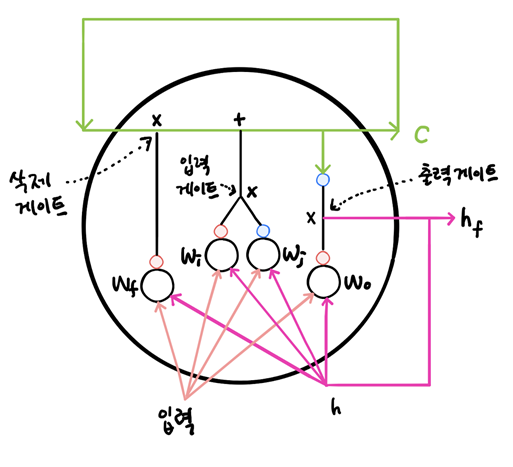
    - 굉장히 복잡한 계산 알고리즘으로 되어 있음
    

**구조의 핵심**
- 새로운 입력과 기존 기억 셸을 연산해 출력을 만들고 기억을 업데이트
- 3개의 게이트(기존 기억과 접목되는 부분)가 있음
    - 계속 모든 값을 기억할 수 없으므로 일부분을 삭제하는 게이트도 있음
    
    
**삭제 게이트**
- w : 가중치, h : 단기기억, c : 장기기억
- 새로운 입력과 단기기억을 가중치와 연산한 후 시그모이드 함수 적용
    - 0~1 사이의 값이 나오면 그 값을 장기기억에 적용
        - ex. 연산 결과값이 0.9가 나오면 장기기억의 0.1만큼의 기억이 삭제됨

**입력 게이트**
- w : 가중치, h : 단기기억, c : 장기기억
1. 새로운 입력과 단기기억을 가중치와 연산한 후 시그모이드 함수 적용
2. 새로운 입력과 단기기억을 가중치와 연산한 후 tanh함수 적용
    - 위 두 값을 곱해 새로 기억할 값을 만들고 해당 값을 장기기억에 c에 추가

**출력 게이트 - RNN의 순환부분**
1. 새로운 입력과 단기기억을 가중치와 연산한 후 시그모이드 함수 적용
2. 장기기억을 tanh 연산 계산
3. 위 두 값을 곱해(다음 층으로 보냄) 출력하고 나머지 게이트로 전달

- w0 : 은닉상태 가중치
- x : 곱하기
- tanh, 시그모이드 : 두 가지 활성화 함수

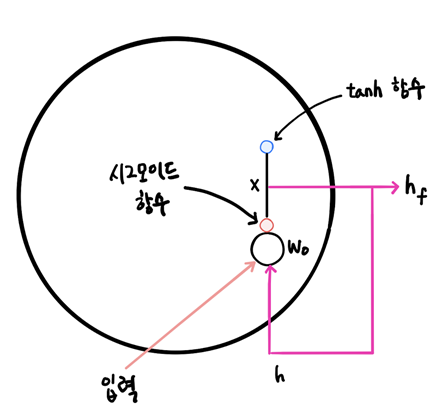
- 입력과 이전 타입스텝의 은닉상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉상태를 만든다.
    - 기본 순환층과 달리 입력에 대해 시그모이드 함수를 사용하고 tanh 함수를 통과한 어떤 값과 곱해져서 은닉상태를 만들게 됨
    - 위 그림을 보면 기본 순환층과 비슷하지만 tanh 함수를 통과한 어떤 값과 곱해지는 과정이 추가됨 (어떤 값인가는 다음 그림에 나옴)

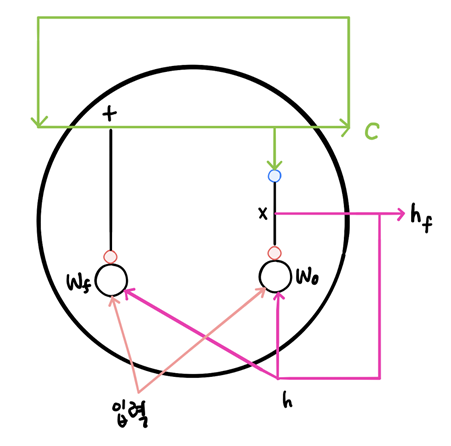
- LSTM은 순환되는 상태가 2개임
    - 은닉상태/셸상태
        - 셸상태는 다음 층으로 전달되지 않고 LSTM 셸에서 순환만 되는 값
        - 위 이미지에서 초록색 선으로 순환하는 값
        - c로 표시
            - 먼저 입력과 은닉상태를 또다른 가중치 wf에 곱한다음 시그모이드 함수를 통과시키고 이전 타임스텝 셸 상태와 곱하여 세로운 셸 상태를 만들어냄
            - 여기서 만들어지는 새로운 셸 상태가 tanh 와 곱해지는 어떤 값임
                - 이값이 새로운 은닉상태를 만드는데 기여하게 됨
                - 즉 이전 타임스텝 데이터에 새로 입력되는 타임스텝 입력값들을 누적시켜서 타임스텝이 지날때마가 계속 새로운 값을 생성(긴 시퀀스를 기억하는 방법)
        - **입력과 은닉상태에 곱해지는 가중치 w0 와 셸상태에 곱해지는 가중치 wf는 다른 값의 가중치여야함**
            - 이 두 셸은 다른 기능을 위해 훈련 함

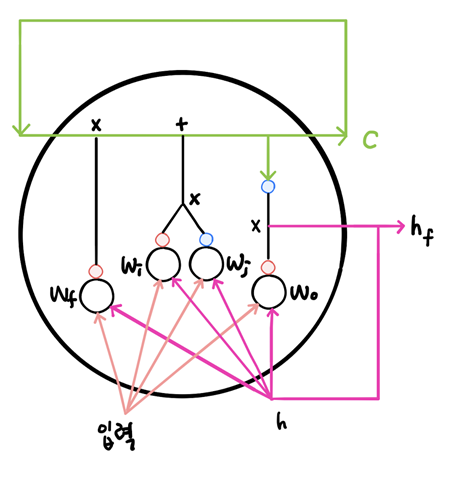
- 여기에 두가지 셸이 더 추가되어 셸 상태를 만드는데 기여함
    - 입력과 은닉상태를 각기 다른 가중치에 곱한 다음
        - 하나는 시그모이드 함수를 통과시키고 다른하나는 tanh 함수를 통과시킴
        - 두 결과를 곱한 후 이전 셸 상태와 더한다
        - **이 결과가 최종 셸 상태임. 긴 시퀀스를 정확하게 기억하기 위한 계산이라고 보면 됨**
        -  wf, wi, wj, w0은 모두 다른 가중치고 각각 셸을 위해 학습된다

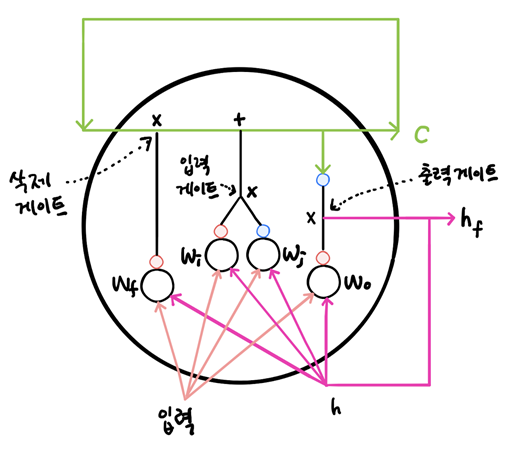
- 위 그림처럼 세 군대의 곱셈을 왼쪽 부터 삭제 게이트, 입력게이트, 출력 케이트 라고 부름

## LSTM 신경망 훈련하기
- IMDB 데이터를 활용하여

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

/home/ubuntu/anaconda3/envs/aws_neuron_tensorflow_p36/lib/python3.6/site-packages/tensorflow_core/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/ubuntu/anaconda3/envs/aws_neuron_tensorflow_p36/lib/python3.6/site-packages/tensorflow_core/python/keras/datasets/imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

### LSTM 층
- keras.layers.LSTM(셸 개수)

In [3]:
from tensorflow import keras

model = keras.Sequential()

# LSTM 모델 구성 코드
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))
          
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


### 파라미터 수
- Simplernn : 임베딩 벡터크기 16 * 뉴런수 + 은닉층크기(64) + 절편 8
    - 16*8 + 64 + 8 = 200
- LSTM 은 작은 셸이 4개 있으므로 SimpleRNN 보다 4배가 늘어남 => 800

In [4]:
# 모델 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
history1 = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 21s 1ms/sample - loss: 0.6922 - acc: 0.5358 - val_loss: 0.6908 - val_acc: 0.5830
Epoch 2/100
20000/20000 [==============================] - 19s 940us/sample - loss: 0.6887 - acc: 0.6081 - val_loss: 0.6859 - val_acc: 0.6346
Epoch 3/100
20000/20000 [==============================] - 19s 944us/sample - loss: 0.6763 - acc: 0.6507 - val_loss: 0.6607 - val_acc: 0.6656
Epoch 4/100
20000/20000 [==============================] - 19s 940us/sample - loss: 0.6298 - acc: 0.7149 - val_loss: 0.6173 - val_acc: 0.7222
Epoch 5/100
20000/20000 [==============================] - 19s 942us/sample - loss: 0.6015 - acc: 0.7380 - val_loss: 0.6011 - val_acc: 0.7268
Epoch 6/100
20000/20000 [==============================] - 19s 940us/sample - loss: 0.5842 - acc: 0.7495 - val_loss: 0.5876 - val_acc: 0.7376
Epoch 7/100
20000/20000 [==============================] - 19s 942us/sample - loss: 0.5701 - acc: 0.7

- 41번에서 조기 종료 (끝난 시점보다 3개 더 위에서 종료)

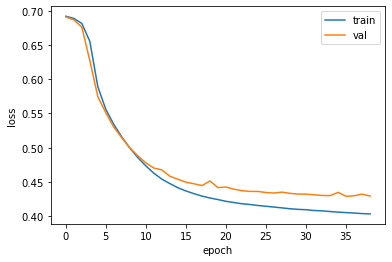

In [12]:
import matplotlib.pyplot as plt

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 기본 순환층 손실 곡선 vs LSTM 손실 곡선
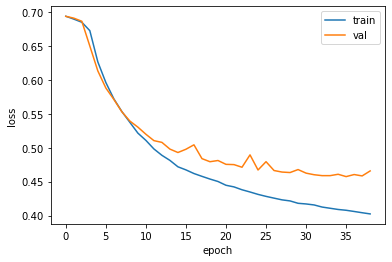
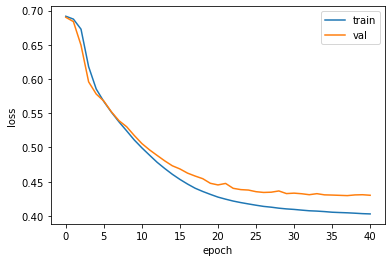
- LSTM이 기본 순환보다 과대적합을 억제하면서 훈련을 진행하고 있음
    - val_loss 와 비슷하게 감

# 더 강하게 과대적합을 억제

## 순환 층에 드롭아웃 적용하기
- keras.layers.LSTM( dropout=비율))

In [5]:
# 2번째 모델
model2 = keras.Sequential()

# 드롭아웃 적용한 모델 생성코드
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))  # 에포크 돌릴 때 30% 끄기 돌리기
model2.add(keras.layers.Dense(1, activation='sigmoid'))

- 동일한 조건으로 훈련

In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

Epoch 1/100
313/313 [==============================] - 10s 25ms/step - loss: 0.6925 - accuracy: 0.5281 - val_loss: 0.6918 - val_accuracy: 0.5672
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6901 - accuracy: 0.5934 - val_loss: 0.6884 - val_accuracy: 0.6214
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6839 - accuracy: 0.6385 - val_loss: 0.6796 - val_accuracy: 0.6516
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6666 - accuracy: 0.6633 - val_loss: 0.6462 - val_accuracy: 0.6730
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6018 - accuracy: 0.7045 - val_loss: 0.5725 - val_accuracy: 0.7236
Epoch 6/100
313/313 [==============================] - 7s 24ms/step - loss: 0.5576 - accuracy: 0.7384 - val_loss: 0.5502 - val_accuracy: 0.7406
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5335 - accuracy: 0.7544 - val_loss: 0.5225 - val_accuracy

In [ ]:
history2 = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

- val_loss: 0.4296 - val_accuracy: 0.8008 : drop-out 적용 전 보다 
- val_loss: 0.4282 - val_accuracy: 0.8040 손실이 살짝 감소됨

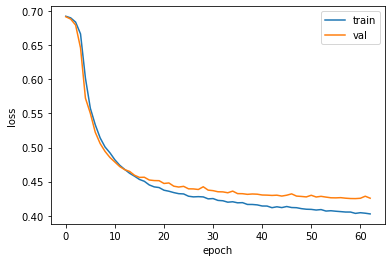

In [15]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기
- 마지막 순환층(LSTM)만 최종 타임스텝의 결과만 출력
- 중간 순환층(LSTM)은 모든 타임 스텝의 결과가 다음 입력으로 넘어가야 함
- return_sequences=True
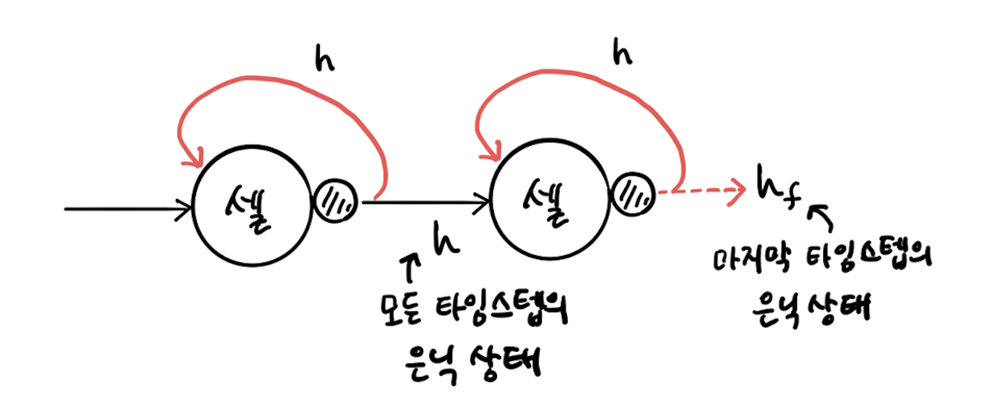

In [16]:
# 3번째 모델
model3 = keras.Sequential()

# 모델구성코드
model3.add(keras.layers.Embedding(500, 16, input_length=100))

# 모든 토큰의 은닉층(출력)이 다음 LSTM으로 전달되어야 함
# 파라미터 조정해야 함 : return_sequences=True
model3.add(Keras.layers.LSTM(8, dropout=0.3))  # LSTM의 중간층, LSTM층과 연결

# 기본 LSTM을 사용하면 마지막 timestep(최종 토큰)의 은닉층(출력)만 전달
model3.add(Keras.layers.LSTM(8, dropout=0.3))  # LSTM의 마지막 층, 밀집층과 연결

model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_4 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history3 = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 46ms/step - loss: 0.6927 - accuracy: 0.5260 - val_loss: 0.6920 - val_accuracy: 0.5828
Epoch 2/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6904 - accuracy: 0.5970 - val_loss: 0.6883 - val_accuracy: 0.6368
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6822 - accuracy: 0.6425 - val_loss: 0.6721 - val_accuracy: 0.6682
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6444 - accuracy: 0.6781 - val_loss: 0.6036 - val_accuracy: 0.7062
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5759 - accuracy: 0.7185 - val_loss: 0.5572 - val_accuracy: 0.7242
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5423 - accuracy: 0.7419 - val_loss: 0.5284 - val_accuracy: 0.7476
Epoch 7/100
313/313 [==============================] - 14s 43ms/step - loss: 0.5250 - accuracy: 0.7521 - val_loss: 0.5116 - val_ac

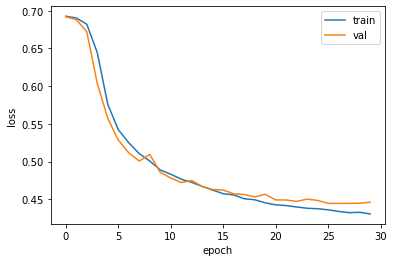

In [18]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 이 데이터에서는 차이가 많이 없지만 순환층을 쌓으면 성능이 높아진다
- val_loss: 0.4298 - val_accuracy: 0.7998

- 1개의 LSTM 층 : val_loss: 0.4288 - val_accuracy: 0.8054
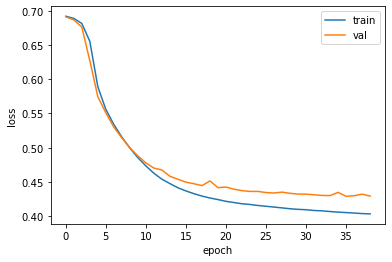
- 1개의 LSTM 층(drop-out) :val_loss: 0.4251 - val_accuracy: 0.8042(60번)
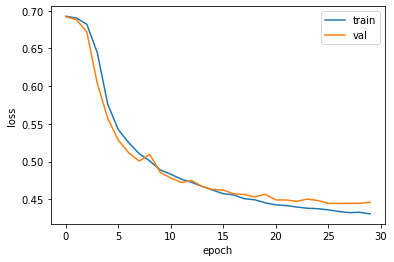
- 2개의 LSTM 층(drop-out) : val_loss: 0.4445 - val_accuracy: 0.7964(27번)
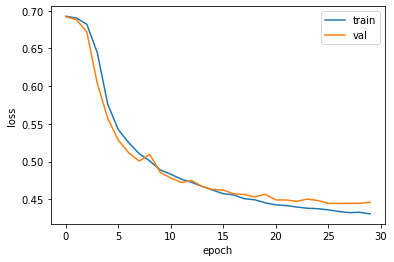

## 순환 신경망 알고리즘 중 LSTM은 신뢰성이 높은 알고리즘으로 알려져 있음